# Mushroom Classification

## Problem Statement
### The Audubon Society Field Guide to North American Mushrooms contains descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom (1981). Each species is labelled as either definitely edible, definitely poisonous, or maybe edible but not recommended. This last category was merged with the toxic category. The Guide asserts unequivocally that there is no simple rule for judging a mushroom's edibility, such as "leaflets three, leave it be" for Poisonous Oak and Ivy.

### The main goal is to predict which mushroom is poisonous & which is edible.

### Approach: The classical machine learning tasks like Data Exploration, Data Cleaning, Feature Engineering, Model Building and Model Testing.

##### <i> Importing pandas and numpy library </i>

In [1]:
import numpy as np
import pandas as pd

In [2]:
Mushroom_DF = pd.read_csv('mushrooms.csv')

##### <i> Printing first five rows of data set </i>

In [3]:
Mushroom_DF.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


##### <i> Printing last 5 rows of data sets </i>

In [4]:
Mushroom_DF.tail(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


In [5]:
Mushroom_DF.shape

(8124, 23)

In [6]:
print('rows',Mushroom_DF.shape[0])
print('columns',Mushroom_DF.shape[1])

rows 8124
columns 23


#### <i> Get Information About the Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement </i>

In [7]:
Mushroom_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [8]:
Mushroom_DF.isnull()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8120,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8121,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8122,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
Mushroom_DF.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

#### <i> Getting overall statistics about the dataset </i>

In [10]:
Mushroom_DF.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


### <b><i> Data Manipulation </b></i>

In [11]:
Mushroom_DF.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [12]:
Mushroom_DF = Mushroom_DF.astype('category')

In [13]:
Mushroom_DF.dtypes

class                       category
cap-shape                   category
cap-surface                 category
cap-color                   category
bruises                     category
odor                        category
gill-attachment             category
gill-spacing                category
gill-size                   category
gill-color                  category
stalk-shape                 category
stalk-root                  category
stalk-surface-above-ring    category
stalk-surface-below-ring    category
stalk-color-above-ring      category
stalk-color-below-ring      category
veil-type                   category
veil-color                  category
ring-number                 category
ring-type                   category
spore-print-color           category
population                  category
habitat                     category
dtype: object

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
Le = LabelEncoder()

In [16]:
for columns in Mushroom_DF.columns:
    Mushroom_DF[columns] = Le.fit_transform(Mushroom_DF[columns])

In [17]:
Mushroom_DF.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


#### <i> Store Feature Matrix In x and Response(Target) In Vector y<i>


In [18]:
x = Mushroom_DF.drop('class',axis = 1)
y = Mushroom_DF['class']

In [19]:
x

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,2,5,5,0,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,...,2,5,5,0,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,...,2,5,5,0,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2


In [20]:
y

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int32

#### <i> Applying Principal Component Analysis <i>


In [21]:
from sklearn.decomposition import PCA

In [22]:
P = PCA(n_components = 7)
PC = P.fit_transform(x)
P.explained_variance_ratio_

array([0.33758733, 0.16581098, 0.12285821, 0.06796611, 0.05831173,
       0.05092539, 0.04670841])

In [23]:
sum(P.explained_variance_ratio_)

0.8501681635086209

#### <i>  Splitting The Dataset Into The Training Set And Test Set <i>


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test,y_train,y_test = train_test_split(PC,y,test_size = 0.20,random_state = 42)

In [26]:
x_train

array([[ 7.11666079, -2.04335194,  0.58359557, ..., -1.90182903,
        -0.80613238, -0.02418546],
       [ 6.17595898,  1.68576215, -0.9681486 , ...,  2.80668201,
         0.4272273 ,  2.56943841],
       [ 7.57107815, -2.40731961,  0.16605645, ..., -0.82338232,
        -0.78361222, -1.1164396 ],
       ...,
       [-4.85510949, -2.15771304, -2.09313421, ...,  3.45422799,
        -0.59087533, -0.72302032],
       [ 6.37808881,  0.67611881,  0.90648856, ...,  3.5043129 ,
        -1.01042025,  1.09420724],
       [ 3.64709333, -1.66274146, -1.21426462, ..., -0.1199789 ,
        -1.4477151 ,  0.65846375]])

In [27]:
y_train

7873    1
6515    1
6141    1
2764    0
438     0
       ..
5226    1
5390    0
860     0
7603    1
7270    0
Name: class, Length: 6499, dtype: int32

In [28]:
Mushroom_DF.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


#### <i> Importing Models <i>


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

#### <i> Model Training <i>


In [30]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

svc = SVC()
svc.fit(x_train,y_train)

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

rm = RandomForestClassifier()
rm.fit(x_train,y_train)

gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)

GradientBoostingClassifier()

#### <i> Prediction on Test Data <i>


In [31]:
y_pred1 = lr.predict(x_test)
y_pred2 = knn.predict(x_test)
y_pred3 = svc.predict(x_test)
y_pred4 = dt.predict(x_test)
y_pred5 = rm.predict(x_test)
y_pred6 = gb.predict(x_test)

#### <i> Evaluating the algorithm <i>


In [32]:
from sklearn.metrics import accuracy_score

In [33]:
print("ACC LR",accuracy_score(y_test,y_pred1))
print("ACC KNN",accuracy_score(y_test,y_pred2))
print("ACC SVC",accuracy_score(y_test,y_pred3))
print("ACC DT",accuracy_score(y_test,y_pred4))
print("ACC RM",accuracy_score(y_test,y_pred5))
print("ACC GBC",accuracy_score(y_test,y_pred6))

ACC LR 0.8344615384615385
ACC KNN 0.9833846153846154
ACC SVC 0.952
ACC DT 0.9766153846153847
ACC RM 0.9981538461538462
ACC GBC 0.9384615384615385


In [34]:
final_Mushroom_DF = pd.DataFrame({'Models':['LR','KNN','SVC','DT','RM','GBC'],
             'ACC': [accuracy_score(y_test,y_pred1)*100,
                    accuracy_score(y_test,y_pred2)*100,
                    accuracy_score(y_test,y_pred3)*100,
                    accuracy_score(y_test,y_pred4)*100,
                    accuracy_score(y_test,y_pred5)*100,
                    accuracy_score(y_test,y_pred6)*100]})


In [35]:
final_Mushroom_DF

,Models,ACC
0,LR,83.446154
1,KNN,98.338462
2,SVC,95.200000
3,DT,97.661538
4,RM,99.815385
5,GBC,93.846154


In [36]:
import seaborn as sns

C:\Users\sarah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='ACC'>

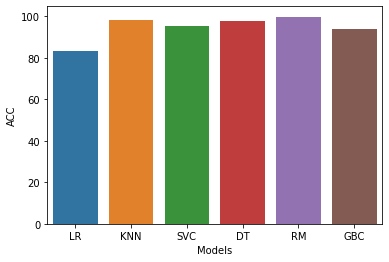

In [37]:
sns.barplot(final_Mushroom_DF['Models'],final_Mushroom_DF['ACC'])

#### <i> Save the model <i>


In [38]:
rf_model = RandomForestClassifier()
rf_model.fit(PC,y)

RandomForestClassifier()

In [39]:
import joblib

In [40]:
joblib.dump(rf_model,"Mushroom_classification")

['Mushroom_classification']

In [41]:
model = joblib.load('Mushroom_classification')

In [42]:
p =model.predict(P.transform([[5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5]]))

C:\Users\sarah\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


In [43]:
if p[0]==1:
    print('Poissonous')
else:
    print('Edible')

Poissonous


#### <i> GUI <i>


In [44]:
from tkinter import *
import joblib

In [ ]:
def show_entry_fields():
    p1=int(e1.get())
    p2=int(e2.get())
    p3=int(e3.get())
    p4=int(e4.get())
    p5=int(e5.get())
    p6=int(e6.get())
    p7=int(e7.get())
    p8=int(e8.get())
    p9=int(e9.get()) 
    p10=int(e10.get())
    p11=int(e11.get())
    
    p12=int(e12.get())
    p13=int(e13.get())
    p14=int(e14.get())
    p15=int(e15.get())
    p16=int(e16.get())
    p17=int(e17.get())
    p18=int(e18.get())
    p19=int(e19.get())
    p20=int(e20.get())
    p21=int(e21.get())
    p22=int(e22.get())
    
    model = joblib.load('Mushroom_classification')
    result=model.predict([[p1,p2,p3,p4,p5,p6,
                           p7,p8,p9,p10,p11,p12,p13,p14,p15,
                            p16,p17,p18,p19,p20,p21,p22]])
    
    if result[0] == 0:
        Label(master, text="Edible").grid(row=31)
    else:
        Label(master, text="Poisonous").grid(row=31)
        
master = Tk()
master.title("Mushroom Classification Using Machine Learning")


label = Label(master, text = "Mushroom Classification Using Machine Learning"
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)


Label(master,text="cap-shape :(cap-shape: bell=0,conical=1,convex=5,flat=2, knobbed=3,sunken=4)").grid(row=1)
Label(master, text="cap-surface:(fibrous=0,grooves=1,scaly=3,smooth=2)").grid(row=2)
Label(master, text="cap-color:(brown=4,buff=0,cinnamon=1,gray=3,green=r, \
pink=5,purple=6,red=2,white=7,yellow=8)").grid(row=3)
Label(master, text="bruises:(bruises=1,no=0)").grid(row=4)
Label(master, text="odor:(almond=0,anise=3,creosote=1,fishy=8,foul=2,\
musty=4,none=5,pungent=6,spicy=7 \
)").grid(row=5)
Label(master, text="gill-attachment:(attached=0,descending=1,free=2,notched=3)").grid(row=6)
Label(master, text="gill-spacing:(close=0,crowded=2,distant=1 \
)").grid(row=7)
Label(master, text="gill-size:(road=0,narrow=1)").grid(row=8)
Label(master, text="gill-color:(black=4,brown=5,buff=0,chocolate=3,gray=2,green=8,orange=6,pink=7,purple=9,red=1,white=10,yellow=11)").grid(row=9)
Label(master, text="stalk-shape:(enlarging=0,tapering=1)").grid(row=10)
Label(master,text="stalk-root:( bulbous=0,club=1,cup=5,equal=2,rhizomorphs=4, \
rooted=3,missing=6)").grid(row=11)

Label(master,text="stalk-surface-above-ring:(fibrous=0,scaly=3,silky=1,smooth=2)").grid(row=12)
Label(master,text="stalk-surface-below-ring:(fibrous=0,scaly=3,silky=1,smooth=2 \
)").grid(row=13)
Label(master,text="stalk-color-above-ring:(brown=4,buff=0,cinnamon=1,gray=3, \
orange=5,pink=6,red=2,white=7,yellow=8)").grid(row=14)
Label(master,text="stalk-color-below-ring:(brown=4,buff=0,cinnamon=1,gray=3, \
orange=5,pink=6,red=2,white=7,yellow=8)").grid(row=15)
Label(master,text="veil-type:(partial=0,universal=1)").grid(row=16)
Label(master,text="veil-color:(brown=0,orange=1,white=2,yellow=3)").grid(row=17)
Label(master,text="ring-number:(none=0,one=1,two=2)").grid(row=18)
Label(master,text="ring-type:(cobwebby=0,evanescent=1,flaring=2,large=3,\
none=4,pendant=5,sheathing=6,zone=7)").grid(row=19)
Label(master,text="spore-print-color:(black=2,brown=3,buff=0,chocolate=1, \
green=5,orange=4,purple=6,white=7,yellow=8 \
)").grid(row=20)

Label(master,text="population:(abundant=0,clustered=1,numerous=2,scattered=3, \
# several=4,solitary=5)").grid(row=21)
Label(master,text="habitat:(grasses=1,leaves=2,meadows=3,paths=4,urban=5,\
# waste=6,woods=0)").grid(row=22)

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)

e12 = Entry(master)
e13 = Entry(master)
e14 = Entry(master)
e15 = Entry(master)
e16 = Entry(master)
e17 = Entry(master)
e18 = Entry(master)
e19 = Entry(master)
e20 = Entry(master)
e21 = Entry(master)
e22 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10,column=1)
e11.grid(row=11,column=1)

e12.grid(row=12,column=1)
e13.grid(row=13,column=1)
e14.grid(row=14,column=1)
e15.grid(row=15,column=1)
e16.grid(row=16,column=1)
e17.grid(row=17,column=1)
e18.grid(row=18,column=1)
e19.grid(row=19,column=1)
e20.grid(row=20,column=1)
e21.grid(row=21,column=1)
e22.grid(row=22,column=1)

Button(master, text='PREDICT', command=show_entry_fields).grid()

mainloop() 